In [10]:
#task 1
import pandas as pd
from scipy.stats import chi2_contingency

# Create the dataframe
data_homogeneity = pd.DataFrame({
    'City_A_Brand_A': [30, 20],
    'City_A_Brand_B': [40, 30],
    'City_A_Brand_C': [20, 50],
    'City_B_Brand_A': [25, 15],
    'City_B_Brand_B': [35, 25],
    'City_B_Brand_C': [15, 30],
}, index=['City_A', 'City_B'])

# Perform Chi-square Test for Homogeneity
chi2_stat, p_val, dof, expected = chi2_contingency(data_homogeneity)

# Output the results
print(f"Chi2 Stat: {chi2_stat}")
print(f"P-Value: {p_val}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(pd.DataFrame(expected, index=['City_A', 'City_B'], columns=data_homogeneity.columns))


Chi2 Stat: 25.383408666496905
P-Value: 0.00011747945511933305
Degrees of Freedom: 5
Expected Frequencies:
        City_A_Brand_A  City_A_Brand_B  City_A_Brand_C  City_B_Brand_A  \
City_A       24.626866       34.477612       34.477612       19.701493   
City_B       25.373134       35.522388       35.522388       20.298507   

        City_B_Brand_B  City_B_Brand_C  
City_A       29.552239       22.164179  
City_B       30.447761       22.835821  


In [11]:
#task 2
import pandas as pd
from scipy.stats import chi2_contingency

# Create the dataframe
data_independence = pd.DataFrame({
    'Sports': [25, 20, 30],
    'Arts': [15, 25, 20],
    'Science': [30, 15, 35],
}, index=['Male', 'Female', 'Other'])

# Perform Chi-square Test for Independence
chi2_stat, p_val, dof, expected = chi2_contingency(data_independence)

# Output the results
print(f"Chi2 Stat: {chi2_stat}")
print(f"P-Value: {p_val}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(pd.DataFrame(expected, index=data_independence.index, columns=data_independence.columns))


Chi2 Stat: 9.129595588235292
P-Value: 0.057940587590006885
Degrees of Freedom: 4
Expected Frequencies:
           Sports       Arts    Science
Male    24.418605  19.534884  26.046512
Female  20.930233  16.744186  22.325581
Other   29.651163  23.720930  31.627907


In [28]:
#task 3
import scipy.stats as stats

# Given data
blood_pressure_existing = [120, 122, 118, 124, 123, 121, 125, 119]
blood_pressure_new_drug = [115, 117, 116, 114, 118, 120, 116, 119]

# Perform paired t-test
t_stat, p_val = stats.ttest_rel(blood_pressure_existing, blood_pressure_new_drug)

# Output the results
print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_val}")

# Check significance at 5% level
alpha = 0.05
print("\nHypothesis:")
print("Null Hypothesis (H0): There is no significant difference in blood pressure between the existing treatment and the new drug.")
print("Alternative Hypothesis (H1): There is a significant difference in blood pressure between the existing treatment and the new drug.")
print("\n")
if p_val < alpha:
    print("Reject the null hypothesis. There is a significant difference.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference.")


T-Statistic: 3.650785348094042
P-Value: 0.008169421772730633

Hypothesis:
Null Hypothesis (H0): There is no significant difference in blood pressure between the existing treatment and the new drug.
Alternative Hypothesis (H1): There is a significant difference in blood pressure between the existing treatment and the new drug.


Reject the null hypothesis. There is a significant difference.


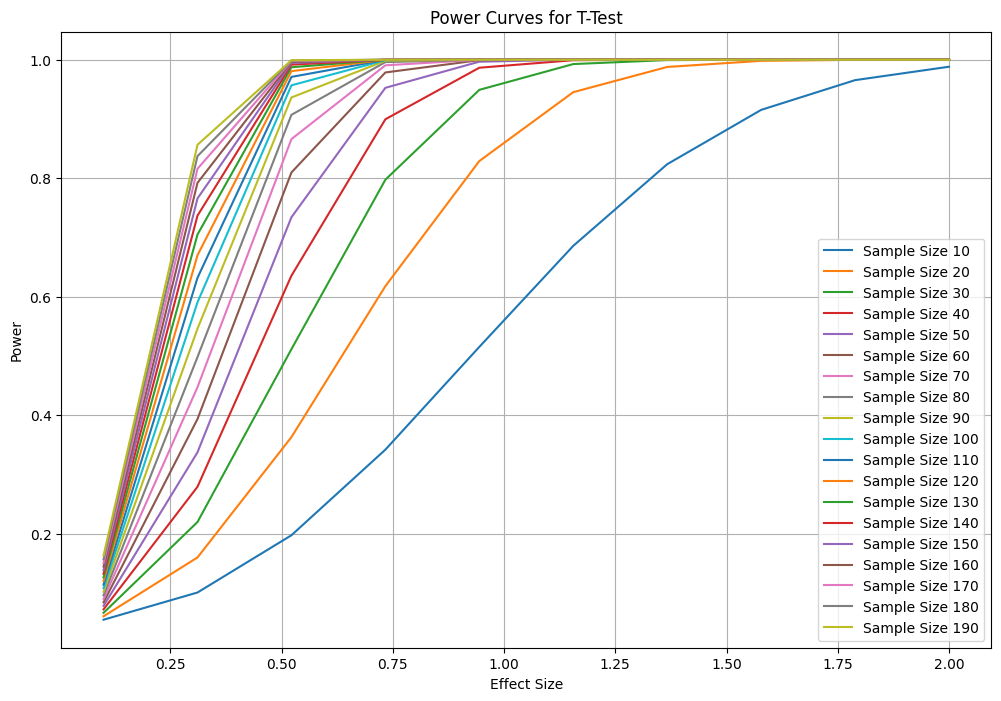

In [30]:
#task 4
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.stats.power as smp

# Set parameters
effect_sizes = np.linspace(0.1, 2, 10)
sample_sizes = np.arange(10, 200, 10)
alpha = 0.05

# Create power curves for different effect sizes and sample sizes
power_curves = []
for size in sample_sizes:
    power = [smp.TTestIndPower().power(effect_size=effect, nobs1=size, alpha=alpha) for effect in effect_sizes]
    power_curves.append(power)

# Plotting
plt.figure(figsize=(12, 8))
for i, size in enumerate(sample_sizes):
    plt.plot(effect_sizes, power_curves[i], label=f'Sample Size {size}')

plt.title('Power Curves for T-Test')
plt.xlabel('Effect Size')
plt.ylabel('Power')
plt.legend()
plt.grid(True)
plt.show()


 different factors that affect the power of a test. 
1.Effect Size: Larger effect sizes lead to higher power.
2.Significance Level (Alpha):Lowering alpha increases power but also increases the risk of Type I errors
3.Sample Size:Larger sample sizes lead to higher power
4.Variability or Standard Deviation:Higher variability decreases power.
5.Type I and Type II Errors:Balancing Type I and Type II error rates is crucial for optimizing power
6.Choice of Statistical Test:Some tests may be more powerful in specific situations.
7.Assumptions of the Test:Violating assumptions can reduce the power of a test

Predicted Exam Score for 8 hours of study: 80.00


C:\Users\shett\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


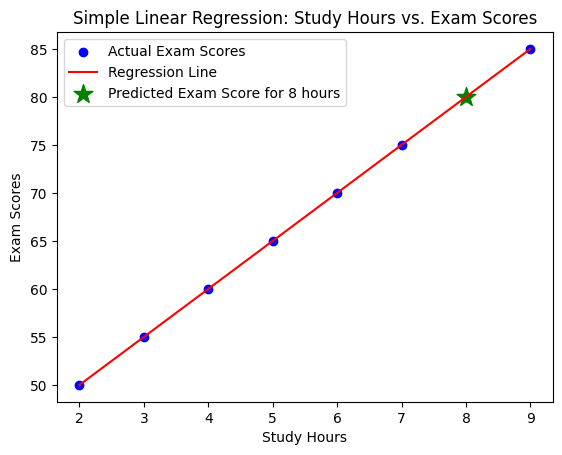

In [35]:
#task 5
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Given data
data_regression = pd.DataFrame({
    'Study_Hours': [2, 3, 4, 5, 6, 7, 8, 9],
    'Exam_Scores': [50, 55, 60, 65, 70, 75, 80, 85],
})

# Extract features (X) and target variable (y)
X = data_regression[['Study_Hours']]
y = data_regression['Exam_Scores']

# Create a linear regression model
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)

# Predict the exam score for a student who studied for 8 hours
hours_to_predict = [[8]]
predicted_score = model.predict(hours_to_predict)

# Print the predicted score
print(f'Predicted Exam Score for 8 hours of study: {predicted_score[0]:.2f}')

# Plot the regression line
plt.scatter(X, y, color='blue', label='Actual Exam Scores')
plt.plot(X, model.predict(X), color='red', label='Regression Line')
plt.scatter(hours_to_predict, predicted_score, color='green', marker='*', s=200, label='Predicted Exam Score for 8 hours')
plt.xlabel('Study Hours')
plt.ylabel('Exam Scores')
plt.title('Simple Linear Regression: Study Hours vs. Exam Scores')
plt.legend()
plt.show()
